# PUBLIC TRANSPORTATION TRANSACTION TRANSJAKARTA

# 1. LATAR BELAKANG

Sistem transportasi umum memainkan peran penting dalam mobilitas perkotaan, memberikan aksesibilitas yang diperlukan bagi penduduk kota untuk bekerja, belajar, dan beraktivitas sehari-hari. Di tengah urbanisasi yang terus meningkat, manajemen dan operasi sistem transportasi menjadi semakin penting untuk memastikan layanan yang efisien dan berkualitas bagi pengguna.

Salah satu sistem transportasi umum yang signifikan adalah Transjakarta, sebuah sistem bus cepat yang menghubungkan berbagai wilayah di Jakarta, ibu kota Indonesia. Dengan jaringan rute yang luas, Transjakarta melayani jutaan penumpang setiap hari. Dalam rangka meningkatkan pengalaman pengguna dan efisiensi operasional, pemahaman yang mendalam tentang pola perjalanan, preferensi pengguna, dan tren penggunaan layanan menjadi sangat penting.

## 1.1. PERNYATAAN MASALAH

Untuk meningkatkan pemahaman tentang penggunaan Transjakarta dan meningkatkan efisiensi operasional, perlu dilakukan tiga jenis analisis: analisis perjalanan, analisis pendapatan, dan analisis demografi.

1. **Analisis Perjalanan** 
- Melibatkan pemahaman mendalam tentang pola perjalanan pengguna Transjakarta. Ini meliputi identifikasi rute yang paling sering digunakan, titik-titik transfer utama, dan waktu perjalanan yang paling umum. Dengan memahami pola perjalanan ini, Transjakarta dapat menyesuaikan jadwal dan rute untuk meningkatkan efisiensi dan kenyamanan pengguna.

2. **Analisis Pendapatan** 
- Penting untuk memahami profil ekonomi pengguna Transjakarta. Ini termasuk tingkat pendapatan mereka, kecenderungan pembelian tiket atau kartu langganan, dan preferensi pembayaran. Analisis ini akan membantu Transjakarta dalam mengatur tarif yang adil dan dapat diakses oleh berbagai lapisan masyarakat, serta mengembangkan program diskon atau insentif bagi pengguna dengan pendapatan rendah.

3. **Analisis Demografi** 
- Demografi pengguna Transjakarta juga penting untuk dipahami. Ini mencakup informasi seperti usia, jenis kelamin, pekerjaan, dan tempat tinggal. Dengan memahami demografi pengguna, Transjakarta dapat menyesuaikan layanan dan fasilitas yang ditawarkan, misalnya dengan menyediakan layanan tambahan untuk kelompok pengguna tertentu atau meningkatkan aksesibilitas bagi mereka yang tinggal di area tertentu.
Dengan kombinasi ketiga analisis ini, Transjakarta akan memiliki pemahaman yang lebih baik tentang kebutuhan dan preferensi pengguna, sehingga memungkinkan mereka untuk meningkatkan layanan secara keseluruhan dan memberikan pengalaman yang lebih baik bagi pengguna.

# 2. DATA PREPARATION


In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
pd.set_option('display.max_columns', None)
import folium

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait 

Ada 22 kolom di dalam dataset Transjakarta, yaitu:  

- transID: Unique transaction id for every transaction
- payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
- payCardBank: Customers card bank issuer name
- payCardName: Customers name that is embedded in the card.
- payCardSex: Customers sex that is embedded in the card
- payCardBirthDate: Customers birth year
- corridorID: Corridor ID / Route ID as key for route grouping.
- corridorName: Corridor Name / Route Name contains Start and Finish for each route.
- direction: 0 for Go, 1 for Back. Direction of the route.
- tapInStops: Tap In (entrance) Stops ID for identifying stops name
- tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
- tapInStopsLat: Latitude of Tap In Stops
- tapInStopsLon: Longitude of Tap In Stops
- stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
- tapInTime: Time of tap in. Date and time
- tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
- tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
- tapOutStopsLat: Latitude of Tap Out Stops
- tapOutStopsLon: Longitude of Tap Out Stops
- stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
- tapOutTime: Time of tap out. Date and time
- payAmount: The number of what customers pay. Some are free. Some not.


Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.

In [487]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


# 3. DATA CLEANING AND PROCESSING

Sebelum memulai analisis, penting bagi kita untuk memahami dataset yang kita miliki melalui tahapan pemahaman data. Dalam proses ini, kita akan mengidentifikasi anomali-anomali yang mungkin ada dalam dataset dan perlu diperbaiki pada tahapan pembersihan data. Setiap langkah dalam menangani anomali tersebut akan didukung oleh penjelasan yang meliputi pengetahuan domain serta analisis statistik.


In [488]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

Dataset df memiliki 37.900 baris dan 22 kolom. Beberapa kolom memiliki nilai null yang perlu ditangani dalam analisis data lebih lanjut. Tipe data dalam dataset meliputi objek, integer, dan float, yang menggambarkan berbagai jenis informasi yang disimpan dalam setiap kolomnya.

In [489]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [490]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

In [491]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Secara umum, berikut adalah penjabaran tentang dataset Transjakarta:

1. Ukuran Dataset: Dataset Transjakarta terdiri dari 22 kolom dan 37.900 baris. Ini menunjukkan jumlah variabel yang disertakan dalam dataset serta jumlah transaksi yang direkam.

2. Data Kosong: Beberapa kolom dalam dataset memiliki nilai yang hilang, yang ditandai sebagai NaN (Not a Number). Kolom-kolom yang terpengaruh adalah corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, dan payAmount.

3. Jumlah Missing Value: Jumlah missing value atau nilai yang kosong terkonsentrasi pada kolom-kolom yang telah disebutkan sebelumnya, menunjukkan bahwa perawatan khusus diperlukan dalam menangani data yang hilang untuk memastikan integritas dan keandalan analisis yang dilakukan.

## 3.1 CHECKING DUPLICATES

In [492]:
df.duplicated().sum()

0

Setelah memeriksa keseluruhan dataset untuk duplikasi, tidak ditemukan adanya data yang sama persis. Meskipun demikian, penting untuk melakukan penelitian lebih lanjut terkait kemungkinan duplikasi yang mungkin ada.

In [493]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [494]:
# Looping untuk memeriksa duplikat berdasarkan tiap kolom
for kolom in df.columns:
    # Memeriksa duplikat pada kolom tertentu
    duplikat_kolom = df.duplicated(subset=[kolom])
    
    # Menampilkan informasi jika ada duplikat pada kolom tertentu
    if duplikat_kolom.any():
        print(f"Duplikat ditemukan pada kolom '{kolom}':")
        print()
    else:
        print(f"Tidak ada duplikat pada kolom '{kolom}'.")


Tidak ada duplikat pada kolom 'transID'.
Duplikat ditemukan pada kolom 'payCardID':

Duplikat ditemukan pada kolom 'payCardBank':

Duplikat ditemukan pada kolom 'payCardName':

Duplikat ditemukan pada kolom 'payCardSex':

Duplikat ditemukan pada kolom 'payCardBirthDate':

Duplikat ditemukan pada kolom 'corridorID':

Duplikat ditemukan pada kolom 'corridorName':

Duplikat ditemukan pada kolom 'direction':

Duplikat ditemukan pada kolom 'tapInStops':

Duplikat ditemukan pada kolom 'tapInStopsName':

Duplikat ditemukan pada kolom 'tapInStopsLat':

Duplikat ditemukan pada kolom 'tapInStopsLon':

Duplikat ditemukan pada kolom 'stopStartSeq':

Duplikat ditemukan pada kolom 'tapInTime':

Duplikat ditemukan pada kolom 'tapOutStops':

Duplikat ditemukan pada kolom 'tapOutStopsName':

Duplikat ditemukan pada kolom 'tapOutStopsLat':

Duplikat ditemukan pada kolom 'tapOutStopsLon':

Duplikat ditemukan pada kolom 'stopEndSeq':

Duplikat ditemukan pada kolom 'tapOutTime':

Duplikat ditemukan pada ko

### 3.1.1. CHECK DUPLICATE IN EACH COLUMN 

In [495]:
check_corridor = df.groupby('corridorName')['corridorID'].nunique()
check_corridor

corridorName
Andara - Stasiun Universitas Pancasila        1
BKN - Blok M                                  1
BSD - Jelambar                                1
BSD Serpong - Fatmawati                       1
Batusari - Grogol                             1
                                             ..
Terminal Rawamangun - Cipinang Muara          1
Terminal Tanah Merah - Pulo Gadung            1
Terminal Tanjung Priok - Ancol Barat          1
Tongtek - Tebet Eco Park (TEP) - Cililitan    1
Universitas Indonesia - Lebak Bulus           1
Name: corridorID, Length: 216, dtype: int64

In [496]:
same_corridor = check_corridor[check_corridor > 1]
same_corridor

corridorName
Blok M - Kota                          2
Kalideres - Bundaran HI via Veteran    2
Matraman Baru - Ancol                  2
Pinang Ranti - Pluit                   2
Pulo Gadung - Monas                    2
Name: corridorID, dtype: int64

In [497]:
result_df = pd.DataFrame({'corridorName': same_corridor.index,
                          'uniqueCorridorID': same_corridor.values})

In [498]:
corridor_ids = []
for corridor_name in result_df['corridorName']:
    unique_ids = df[df['corridorName'] == corridor_name]['corridorID'].unique()
    corridor_ids.append(unique_ids)
result_df['corridorID'] = corridor_ids
result_df

,corridorName,uniqueCorridorID,corridorID
0,Blok M - Kota,2,"[M1, 1]"
1,Kalideres - Bundaran HI via Veteran,2,"[M3, 3, nan]"
2,Matraman Baru - Ancol,2,"[5, nan, M5]"
3,Pinang Ranti - Pluit,2,"[M9, 9, nan]"
4,Pulo Gadung - Monas,2,"[2, M2, nan]"


In [499]:
df.loc[(df['corridorName'] == 'Blok M - Kota') & (df['corridorID'] == 'M1'), 'corridorName'] = 'Blok M - Kota(M)'
df.loc[(df['corridorName'] == 'Kalideres - Bundaran HI via Veteran') & (df['corridorID'] == 'M3'), 'corridorName'] = 'Kalideres - Bundaran HI via Veteran(M)'
df.loc[(df['corridorName'] == 'Matraman Baru - Ancol') & (df['corridorID'] == 'M5'), 'corridorName'] = 'Matraman Baru - Ancol(M)'
df.loc[(df['corridorName'] == 'Pinang Ranti - Pluit') & (df['corridorID'] == 'M9'), 'corridorName'] = 'Pinang Ranti - Pluit(M)'
df.loc[(df['corridorName'] == 'Pulo Gadung - Monas') & (df['corridorID'] == 'M2'), 'corridorName'] = 'Pulo Gadung - Monas(M)'


Setelah melakukan pemeriksaan lebih lanjut terhadap duplikasi, terungkap bahwa terdapat satu nama koridor yang terhubung dengan dua corridorID yang berbeda. Situasi ini disebabkan oleh perbedaan jam operasional yang diterapkan pada koridor yang sama. Untuk mencegah kebingungan, koridor yang sama tersebut akan ditandai dengan kode tambahan (M) untuk menunjukkan jam operasional malam hari.

## 3.2. HANDLING MISSING VALUE

In [500]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [501]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

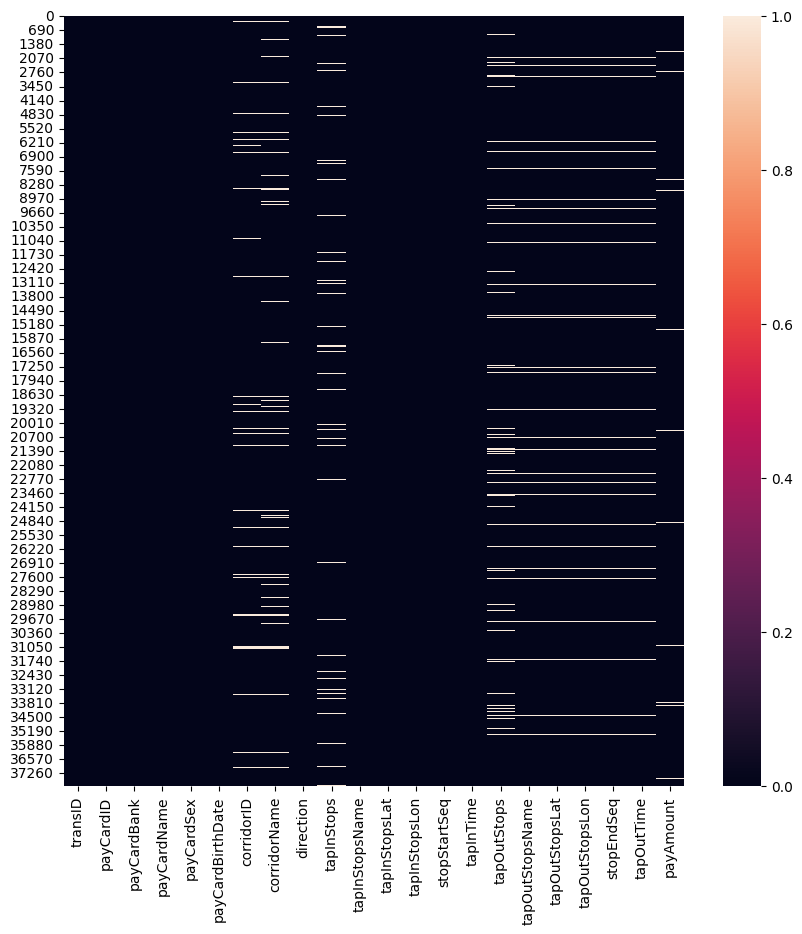

In [502]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount']].isna())

### 3.2.1. Missing Value Corridor ID Menggunakan mapping corridor name

In [503]:
corridor_id_mapping = df.dropna(subset=['corridorID']).drop_duplicates('corridorName')
corridor_id_mapping = corridor_id_mapping.set_index('corridorName')['corridorID']

In [504]:
def fill_missing_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']):
        return corridor_id_mapping.get(row['corridorName'])
    return row['corridorID']

In [505]:
df['corridorID'] = df.apply(fill_missing_corridor_id, axis=1)

### 3.2.2. Missing Value Corridor ID menggunakan tapInStopsLat dan tapInStopLon

In [506]:
corridor_id_mapping1 = df.dropna(subset=['corridorID']).drop_duplicates(['tapInStopsLat', 'tapInStopsLon'])
corridor_id_mapping1 = corridor_id_mapping1.set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']

In [507]:
def fill_missing_corridor_id1(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']):
        return corridor_id_mapping1.get((row['tapInStopsLat'], row['tapInStopsLon']))
    return row['corridorID']

In [508]:
df['corridorID'] = df.apply(fill_missing_corridor_id1, axis=1)

### 3.2.3 Missing Value Corridor Name

In [509]:
corridor_name_mapping = df.dropna(subset=['corridorName']).drop_duplicates('corridorID')
corridor_name_mapping = corridor_name_mapping.set_index('corridorID')['corridorName']

In [510]:
def fill_missing_corridor_name(row):
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID']):
        return corridor_name_mapping.get(row['corridorID'])
    return row['corridorName']

In [511]:
df['corridorName'] = df.apply(fill_missing_corridor_name, axis=1)

### 3.2.3. Missing Value tapInStops

Kolom tapInStops yang kosong diisi berdasarkan pemetaan lokasi halte dengan menggunakan latitude dan longitude yang tersedia. Setiap pasangan latitude dan longitude digunakan untuk menentukan nama dan lokasi halte titik awal, sehingga setiap lokasi tap in stop memiliki nama yang sesuai.

In [512]:
tap_in_stops_mapping = df.dropna(subset=['tapInStops']).drop_duplicates(['tapInStopsLon', 'tapInStopsLat'])
tap_in_stops_mapping = tap_in_stops_mapping.set_index(['tapInStopsLon', 'tapInStopsLat'])['tapInStops']

In [513]:
def fill_missing_tapInStops(row):
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsLon']) and pd.notnull(row['tapInStopsLat']):
        return tap_in_stops_mapping.get((row['tapInStopsLon'], row['tapInStopsLat']))
    return row['tapInStops']

In [514]:
df['tapInStops'] = df.apply(fill_missing_tapInStops, axis=1)

### 3.2.4. Missing Value tapOutStops

In [515]:
tap_out_stops_mapping = df.dropna(subset=['tapOutStops']).drop_duplicates(['tapOutStopsLon', 'tapOutStopsLat'])
tap_out_stops_mapping = tap_out_stops_mapping.set_index(['tapOutStopsLon', 'tapOutStopsLat'])['tapOutStops']

In [516]:
def fill_missing_tapOutStops(row):
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsLon']) and pd.notnull(row['tapOutStopsLat']):
        return tap_out_stops_mapping.get((row['tapOutStopsLon'], row['tapOutStopsLat']))
    return row['tapOutStops']

In [517]:
df['tapOutStops'] = df.apply(fill_missing_tapOutStops, axis=1)

### 3.2.5. Missing Value tapOutStopsName
Data yang hilang pada kolom tapOutStopsName, yang merupakan nama halte tap out, diisi berdasarkan pemetaan dengan menggunakan ID tapInStops. Karena kedua informasi ini dapat saling mewakili, pengisian nilai yang hilang dilakukan dengan memetakan ID tapInStops yang sesuai dengan nama halte tap out yang digunakan. Dengan demikian, setiap transaksi akan memiliki informasi yang lengkap tentang lokasi tap out yang sesuai dengan lokasi tap in yang tercatat.

In [518]:
tap_out_stops_name_mapping = df.dropna(subset=['tapOutStopsName']).drop_duplicates('tapOutStops')
tap_out_stops_name_mapping = tap_out_stops_name_mapping.set_index('tapOutStops')['tapOutStopsName']

In [519]:
def fill_missing_tapOutStopsName(row):
    if pd.isnull(row['tapOutStopsName']) and pd.notnull(row['tapOutStops']):
        return tap_out_stops_name_mapping.get(row['tapOutStops'])
    return row['tapOutStopsName']

In [520]:
df['tapOutStopsName'] = df.apply(fill_missing_tapOutStopsName, axis=1)

### 3.2.6. Missing Value tapOutStopsLat
Data yang hilang pada kolom tapOutStopsLat, yang merupakan latitude halte tap out, diisi berdasarkan pemetaan dengan ID tapInStops yang sesuai. Langkah ini diambil dengan pertimbangan yang sama seperti pengisian data untuk kolom tapOutStopsName, karena informasi latitude dan longitude pada halte tap out dapat saling merepresentasikan lokasi tapOutStop. Dengan demikian, satu pasangan latitude dan longitude dapat digunakan untuk menentukan nama dan lokasi tap out stops yang terkait.

In [521]:
tap_out_stops_lat_mapping = df.dropna(subset=['tapOutStopsLat']).drop_duplicates('tapOutStops')
tap_out_stops_lat_mapping = tap_out_stops_lat_mapping.set_index('tapOutStops')['tapOutStopsLat']

In [522]:
def fill_missing_tapOutStopsLat(row):
    if pd.isnull(row['tapOutStopsLat']) and pd.notnull(row['tapOutStops']):
        return tap_out_stops_lat_mapping.get(row['tapOutStops'])
    return row['tapOutStopsLat']

In [523]:
df['tapOutStopsLat'] = df.apply(fill_missing_tapOutStopsLat, axis=1)

### 3.2.7. Missing Value tapOutStopsLon
Data yang hilang pada kolom tapOutStopsLon, yang merupakan longitud halte tap out, diisi dengan memetakan ID tapInStops yang sesuai. Alasan di balik langkah ini sama dengan pengisian data untuk kolom tapOutStopsName, yaitu karena informasi latitude dan longitude pada halte tap out dapat saling merepresentasikan lokasi tapOutStop. Dengan demikian, satu pasangan latitude dan longitude cukup untuk menentukan nama dan lokasi tap out stops yang terkait.

In [524]:
tap_out_stops_lon_mapping = df.dropna(subset=['tapOutStopsLon']).drop_duplicates('tapOutStops')
tap_out_stops_lon_mapping = tap_out_stops_lon_mapping.set_index('tapOutStops')['tapOutStopsLon']

In [525]:
def fill_missing_tapOutStopsLon(row):
    if pd.isnull(row['tapOutStopsLon']) and pd.notnull(row['tapOutStops']):
        return tap_out_stops_lon_mapping.get(row['tapOutStops'])
    return row['tapOutStopsLon']

In [526]:
df['tapOutStopsLon'] = df.apply(fill_missing_tapOutStopsLon, axis=1)

### 3.2.8. Missing Value payAmount
Tarif untuk layanan Transjakarta adalah flat sebesar Rp.3500, kecuali untuk Royal Trans yang melayani perjalanan lintas Jabodetabek, yang dikenakan tarif sebesar Rp.20.000. Selain itu, terdapat juga beberapa halte yang memberikan tarif gratis sebesar Rp.0 dalam kondisi tertentu, sehingga analisis lebih lanjut menjadi sulit dilakukan. Untuk mengisi nilai yang hilang dalam kolom tarif ini, jika koridor melayani lintas Jabodetabek, akan diisi dengan nilai tarif Rp.20.000, sedangkan untuk koridor lainnya akan dikenakan tarif flat sebesar Rp.3500.

In [527]:
filtered_data_20k = df[df['payAmount'] == 20000]['corridorName'].unique()
filtered_data_20k

array(['Cibubur - Balai Kota', 'Bekasi Barat - Kuningan',
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati', 'Senen - Blok M',
       'Stasiun Tebet - Karet via Patra Kuningan', 'Cibubur - BKN',
       'Bekasi Barat - Blok M', 'Cinere - Kuningan',
       'Cibubur Junction - Blok M', 'Cibubur - Kuningan',
       'BSD Serpong - Fatmawati', 'Tanah Abang - Blok M'], dtype=object)

In [528]:
target_corridors = [
    'Cibubur - Balai Kota', 'Bekasi Barat - Kuningan',
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati','Bekasi Barat - Blok M',
       'Cinere - Kuningan', 'Cibubur Junction - Blok M',
       'Cibubur - Kuningan', 'BSD Serpong - Fatmawati'
]

In [529]:
def fill_pay_amount(row):
    if row['corridorName'] in target_corridors and pd.isna(row['payAmount']):
        return 20000
    elif pd.isna(row['payAmount']):
        return 3500
    else:
        return row['payAmount']

In [530]:
df['payAmount'] = df.apply(fill_pay_amount, axis=1)

In [531]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          33  
corridorName        33  
direction           0   
tapInStops          34  
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           0   
dtype: int64

Setelah mengisi nilai yang hilang, masih terdapat sekitar 3% sisa nilai yang kosong dari jumlah awal sekitar 6%. Nilai yang tidak terisi ini karena kolom tersebut tidak memenuhi syarat untuk diisi dengan mapping dari kolom referensi yang tidak kosong. Maka, baris-baris dengan nilai yang kosong selanjutnya akan dihapus dari dataset.

In [532]:
df = df.dropna(subset=['corridorID'])
df = df.dropna(subset=['tapInStops'])
df = df.dropna(subset=['tapOutStops'])
df = df.dropna(subset=['stopEndSeq'])
df = df.dropna(subset=['tapOutTime'])

In [533]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

## 3.3 TIME MODIFICATION

Berdasarkan pemahaman data sebelumnya, kita mencatat bahwa kolom tapInTime dan tapOutTime memiliki tipe data objek yang perlu diubah. Untuk meningkatkan analisis waktu yang lebih mendalam, penting untuk memecah waktu dan tanggal menjadi komponen-komponen seperti jam, hari, dan minggu. Berikut adalah perubahan waktu yang diperlukan:

### 3.3.1 HOUR

In [534]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df["tapInHour"] = df["tapInTime"].dt.hour
df["tapOutHour"] = df["tapOutTime"].dt.hour


### 3.3.2. DAY

In [535]:
df['tapInDay'] = df['tapInTime'].dt.dayofweek

tapInDay = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['tapInDay'] = df['tapInDay'].map(tapInDay)

### 3.3.3. WEEK

In [536]:
df["tapInWeek"] =df['tapOutTime'].dt.strftime('%d')

# 4. DATA CLEAN
Setelah menyelesaikan proses cleaning, kita mendapatkan dataframe yang bersih dan dapat digunakan untuk analisis lebih lanjut.

In [537]:
df.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,tapInWeek
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,03
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,03
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,03
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,03
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,03


In [538]:
df.to_csv('transjakarta_cleaned.csv', index=False)

In [539]:
# Menyimpan DataFrame ke dalam file Excel
df.to_excel('transjakarta_cleaned.xlsx', index=False)


# 5. ANALYSIS AND VISUALIZATION
Setelah menyelesaikan proses pembersihan data dan melakukan modifikasi pada data waktu sesuai kebutuhan, langkah selanjutnya adalah melakukan analisis data menggunakan data yang telah dibersihkan. Analisis ini akan difokuskan pada poin-poin yang tercantum dalam pernyataan masalah agar dapat memberikan jawaban yang tepat dan sesuai dengan permasalahan yang dihadapi.

## 5.1. TRAFFIC ANALYSIS


### 5.1.1. FREQUENCY OF USE BASED ON CORRIDOR

In [540]:
# Memilih kolom-kolom yang diperlukan untuk analisis
df_rute = df[['corridorName', 'tapInTime', 'tapOutTime', 'payAmount']]

# Menghitung frekuensi penggunaan setiap koridor/rute
frekuensi_rute = df_rute['corridorName'].value_counts()

# Menyatukan hasil analisis menjadi satu dataframe
hasil_analisis = pd.DataFrame({'Frekuensi Penggunaan': frekuensi_rute})

# Cetak hasil analisis
print("Analisis Penggunaan Berdasarkan Koridor/Rute:")
hasil_analisis

Analisis Penggunaan Berdasarkan Koridor/Rute:


,Frekuensi Penggunaan
corridorName,
Cibubur - Balai Kota,389
Ciputat - CSW,383
Harmoni - Jakarta International Stadium,342
Kampung Rambutan - Pondok Gede,335
Rusun Pondok Bambu - Walikota Jakarta Timur,333
...,...
Senen - Tanah Abang,38
Term. Pulo Gadung - Lampiri,30
Tanah Abang - Kebayoran Lama via Pos Pengumben,22


Analisis Penggunaan Berdasarkan Koridor/Rute menunjukkan pola penggunaan yang bervariasi. Lima koridor teratas yang paling sering digunakan adalah Cibubur - Balai Kota, Ciputat - CSW, Harmoni - Jakarta International Stadium, Kampung Rambutan - Pondok Gede, dan Rusun Pondok Bambu - Walikota Jakarta Timur, masing-masing dengan frekuensi penggunaan antara 333 hingga 389. 

Sementara itu, koridor-koridor dengan frekuensi penggunaan terendah adalah Senen - Tanah Abang, Term. Pulo Gadung - Lampiri, Tanah Abang - Kebayoran Lama via Pos Pengumben, Matraman Baru - Ancol(M), dan Kampung Rambutan - Blok M, dengan jumlah penggunaan mulai dari 17 hingga 38. Analisis ini memberikan gambaran tentang tingkat popularitas masing-masing koridor, yang dapat menjadi dasar untuk penyesuaian layanan dan pengelolaan koridor yang lebih efektif.

### 5.1.2. FREQUENCY OF USE BASED ON EACH STOP

In [541]:
# Hitung frekuensi penggunaan tiap nama halte
halte_frequency = df['tapInStopsName'].value_counts()
halte_frequency

tapInStopsName
Penjaringan                       235
Garuda Taman Mini                 203
BKN                               163
BNN LRT                           150
Pejaten                           146
                                 ... 
Jln. Simprug Golf 2               1  
Sbr. Jln. Sungai Barito Sembar    1  
Taman Bambu 2                     1  
Megatama                          1  
Jln. Gunung Galunggung 1          1  
Name: count, Length: 2491, dtype: int64

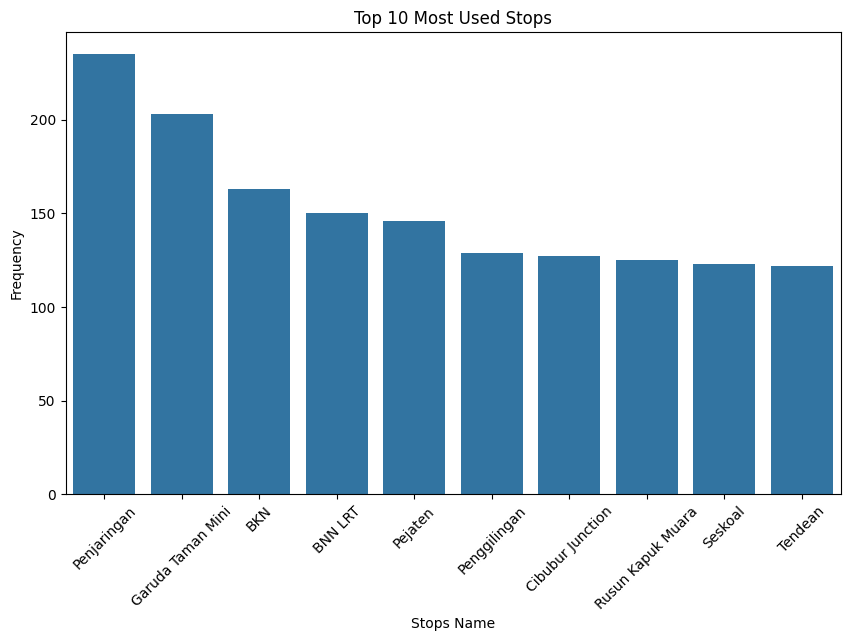

In [542]:
# Visualisasi frekuensi penggunaan tiap nama halte
plt.figure(figsize=(10, 6))
sns.countplot(x='tapInStopsName', data=df, order=df['tapInStopsName'].value_counts().index[:10])
plt.title('Top 10 Most Used Stops')
plt.xlabel('Stops Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### 5.1.3. USAGE PREFERENCES BY DAY

In [543]:
# Konversi kolom waktu menjadi tipe data datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Ekstrak nama hari
hari = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
df["tapInTime_day"] = df["tapInTime"].dt.dayofweek.map(hari)
df["tapOutTime_day"] = df["tapOutTime"].dt.dayofweek.map(hari)

# Hitung jumlah transaksi per hari
transactions_per_day = df["tapInTime_day"].value_counts()
transactions_per_day

tapInTime_day
Jumat     6645
Senin     6604
Selasa    6591
Rabu      6574
Kamis     6574
Minggu    1751
Sabtu     1735
Name: count, dtype: int64

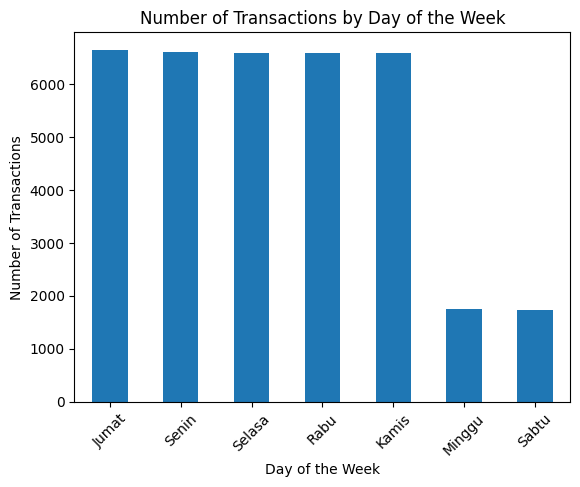

In [544]:
# Visualisasi data
transactions_per_day.plot(kind="bar")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Day of the Week')
plt.xticks(rotation=45)
plt.show()

### 5.1.4. USAGE PREFERENCES BASED ON HOURS

In [545]:
# 2. Analisis jam sibuk
busiest_hours = df['tapInTime'].dt.hour.value_counts()
print("Jam-jam sibuk:\n", busiest_hours)

Jam-jam sibuk:
 tapInTime
6     5619
17    5281
16    3235
5     3234
8     2779
9     2714
7     2693
19    2364
18    2332
20    2326
21    2065
15    386 
13    338 
11    327 
12    327 
10    287 
14    167 
Name: count, dtype: int64


In [546]:
travel_hour_preference = df['tapInTime'].dt.hour.mode()[0]
print("Preferensi jam perjalanan:", travel_hour_preference)

Preferensi jam perjalanan: 6


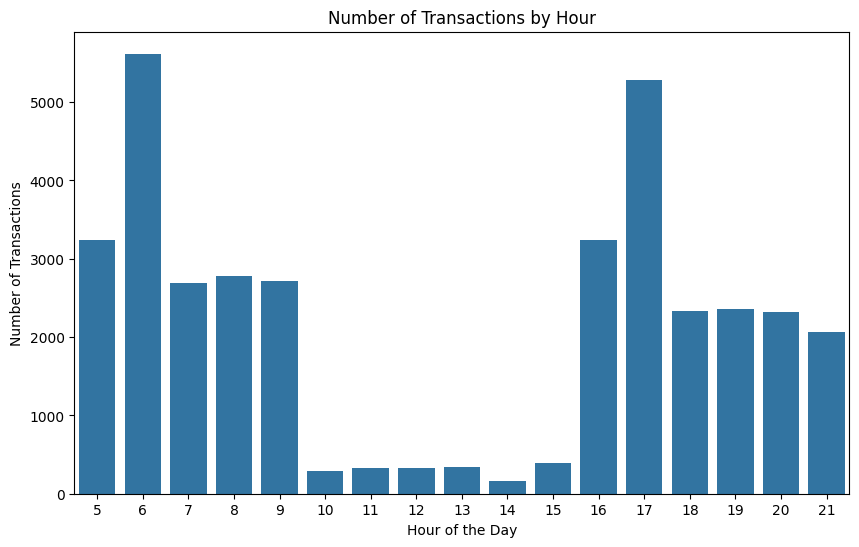

In [547]:
# Visualisasi pola perjalanan pelanggan berdasarkan jam
plt.figure(figsize=(10, 6))
sns.countplot(x='tapInHour', data=df)
plt.title('Number of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

### 5.1.5. BANK CARD DISTRIBUTION

In [548]:
transactions_by_card_type = df["payCardBank"].value_counts().reset_index(name='Total')
print('Jumlah transaksi per jenis kartu:')
transactions_by_card_type

Jumlah transaksi per jenis kartu:


,payCardBank,Total
0,dki,18015
1,emoney,6625
2,brizzi,3390
3,flazz,3101
4,online,2765
5,bni,2578


## 5.2. REVENUE ANALYSIS

### 5.2.1. NUMBER OF TRANSACTIONS PER DAY

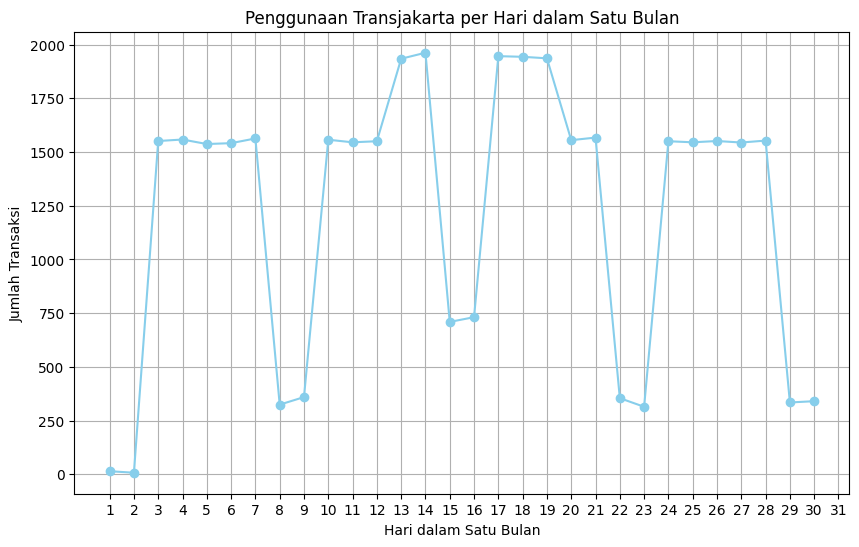

In [549]:
# Menambahkan kolom untuk menentukan tanggal dalam satu bulan
df['DayOfMonth'] = df['tapInTime'].dt.day

# Mengelompokkan data berdasarkan tanggal dalam satu bulan dan menghitung jumlah transaksi per hari
transactions_per_day = df.groupby('DayOfMonth').size()

# Memvisualisasikan penggunaan Transjakarta per hari dalam satu bulan
plt.figure(figsize=(10, 6))
transactions_per_day.plot(kind='line', marker='o', color='skyblue')
plt.title('Penggunaan Transjakarta per Hari dalam Satu Bulan')
plt.xlabel('Hari dalam Satu Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

In [550]:
# Mendapatkan tanggal dari kolom 'tapInTime'
df['tapInDate'] = df['tapInTime'].dt.date

# Memilih kolom-kolom yang diperlukan untuk analisis pola perjalanan harian
df_daily = df[['tapInDate', 'tapInStopsName', 'tapOutStopsName']]

# Mengelompokkan data berdasarkan tanggal dan berapa kali penggunaan di hari itu
daily_usage = df_daily.groupby('tapInDate').size().reset_index(name='DailyUsage')

# Menampilkan DataFrame hasil analisis
print("DataFrame Hasil Analisis Pola Perjalanan Harian:")
daily_usage

DataFrame Hasil Analisis Pola Perjalanan Harian:


,tapInDate,DailyUsage
0,2023-04-01,14
1,2023-04-02,7
2,2023-04-03,1551
3,2023-04-04,1558
4,2023-04-05,1537
5,2023-04-06,1541
6,2023-04-07,1563
7,2023-04-08,324
8,2023-04-09,359
9,2023-04-10,1557


### 5.2.2 REVENUE PER CORRIDOR

In [551]:
# Hitung total pendapatan per koridor
revenue_by_corridor = df.groupby('corridorName')['payAmount'].sum()
revenue_by_corridor.head()

corridorName
Andara - Stasiun Universitas Pancasila    3500.0   
BKN - Blok M                              1074500.0
BSD - Jelambar                            434000.0 
BSD Serpong - Fatmawati                   1860000.0
Batusari - Grogol                         882000.0 
Name: payAmount, dtype: float64

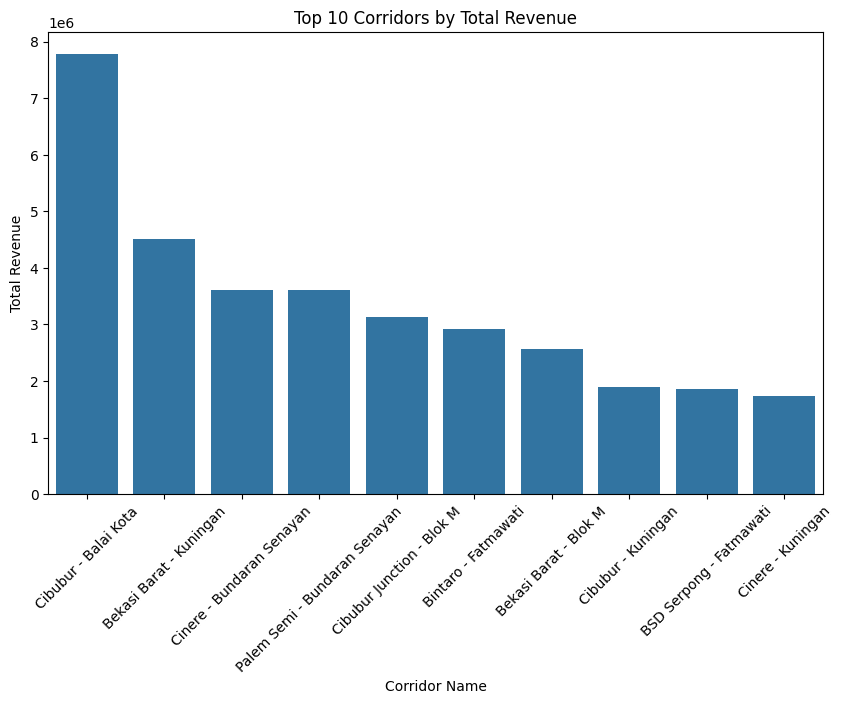

In [552]:
# Hitung total pendapatan per koridor dan ambil 10 teratas
revenue_by_corridor_top10 = df.groupby('corridorName')['payAmount'].sum().nlargest(10)

# Visualisasi total pendapatan per koridor (10 teratas)
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_corridor_top10.index, y=revenue_by_corridor_top10.values)
plt.title('Top 10 Corridors by Total Revenue')
plt.xlabel('Corridor Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### 5.2.3 REVENUE PER CORRIDOR BY DAY

In [553]:
# Mengubah kolom tapInTime menjadi tipe data datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

# Menambahkan kolom hari berdasarkan tanggal
df['Day'] = df['tapInTime'].dt.day_name()

# Menghitung pendapatan per koridor berdasarkan hari
revenue_per_day = df.groupby(['Day', 'corridorName'])['payAmount'].sum()
revenue_by_corridor

corridorName
Andara - Stasiun Universitas Pancasila        3500.0   
BKN - Blok M                                  1074500.0
BSD - Jelambar                                434000.0 
BSD Serpong - Fatmawati                       1860000.0
Batusari - Grogol                             882000.0 
                                                ...    
Terminal Rawamangun - Cipinang Muara          0.0      
Terminal Tanah Merah - Pulo Gadung            0.0      
Terminal Tanjung Priok - Ancol Barat          0.0      
Tongtek - Tebet Eco Park (TEP) - Cililitan    3500.0   
Universitas Indonesia - Lebak Bulus           644000.0 
Name: payAmount, Length: 221, dtype: float64

Codingan ini digunakan untuk menghitung total pendapatan per koridor dan menampilkan 10 koridor teratas berdasarkan pendapatan total. 

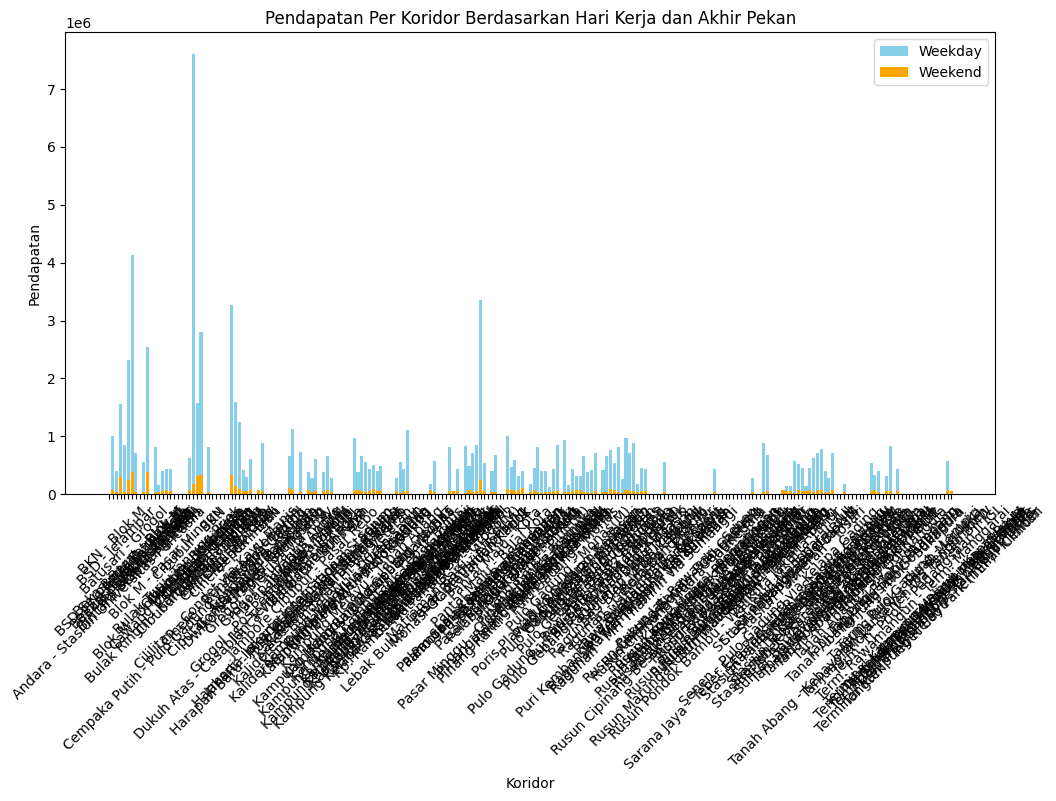

In [554]:
# Menambahkan kolom untuk menentukan apakah hari kerja atau weekend
df['DayOfWeek'] = df['tapInTime'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])  # 5 dan 6 adalah Sabtu dan Minggu

# Memisahkan data menjadi dua kelompok: weekday dan weekend
weekday_data = df[~df['IsWeekend']]
weekend_data = df[df['IsWeekend']]

# Menghitung pendapatan per koridor untuk weekday
weekday_revenue = weekday_data.groupby('corridorName')['payAmount'].sum()

# Menghitung pendapatan per koridor untuk weekend
weekend_revenue = weekend_data.groupby('corridorName')['payAmount'].sum()

# Memvisualisasikan pendapatan per koridor untuk weekday dan weekend
plt.figure(figsize=(12, 6))
plt.bar(weekday_revenue.index, weekday_revenue.values, color='skyblue', label='Weekday')
plt.bar(weekend_revenue.index, weekend_revenue.values, color='orange', label='Weekend')
plt.title('Pendapatan Per Koridor Berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Koridor')
plt.ylabel('Pendapatan')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 5.3. DEMOGRAPHY ANALYSIS

### 5.3.1. NUMBER OF TRANSACTIONS BASED ON GENDER

payCardSex
F    19429
M    17045
Name: count, dtype: int64
payCardSex
F    53.268081
M    46.731919
Name: count, dtype: float64


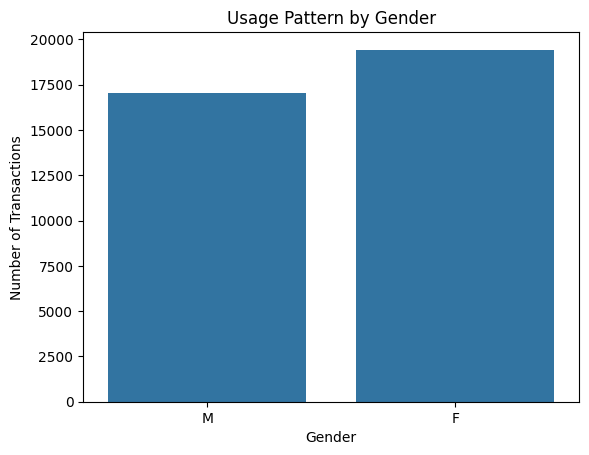

In [555]:
# Hitung jumlah transaksi per jenis kelamin
transactions_by_sex = df["payCardSex"].value_counts()
print(transactions_by_sex)

# Hitung persentase transaksi
total_transactions = df["payCardSex"].count()
sex_percentages = (transactions_by_sex / total_transactions) * 100
print(sex_percentages)

# Visualisasi pola penggunaan berdasarkan jenis kelamin
sns.countplot(x='payCardSex', data=df)
plt.title('Usage Pattern by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

Data menunjukkan jumlah transaksi berdasarkan jenis kelamin pengguna kartu pembayaran. Dari total transaksi yang tercatat, sebanyak 19.429 transaksi (atau sekitar 53,27%) dilakukan oleh pengguna dengan jenis kelamin perempuan (F), sedangkan sekitar 17.045 transaksi (atau sekitar 46,73%) dilakukan oleh pengguna dengan jenis kelamin laki-laki (M). Analisis ini memberikan gambaran tentang sebaran transaksi berdasarkan jenis kelamin, yang dapat berguna untuk memahami preferensi atau kebiasaan pengguna dalam menggunakan layanan transportasi umum.

### 5.3.2. FREQUENCY OF CORRIDOR USE BASED ON GENDER

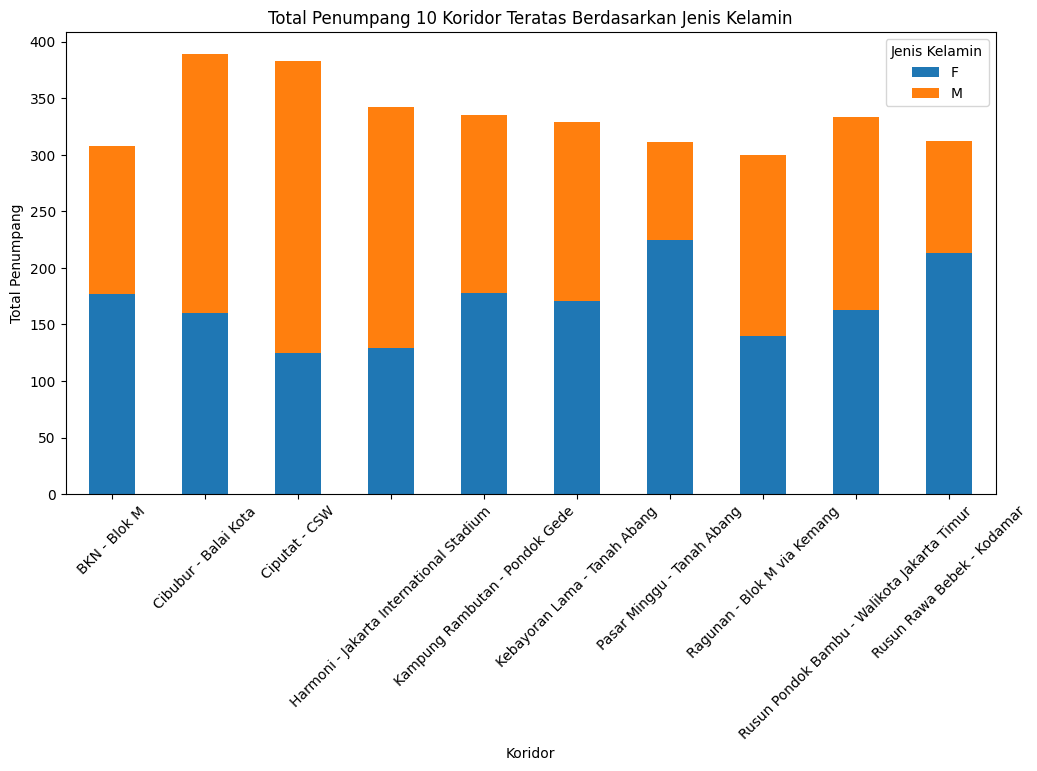

In [556]:
# Menghitung total penumpang untuk setiap koridor
passenger_counts = df['corridorName'].value_counts()

# Memilih 10 koridor dengan jumlah penumpang terbanyak
top_10_corridors = passenger_counts.head(10).index

# Memfilter dataset hanya untuk 10 koridor teratas
filtered_dataset = df[df['corridorName'].isin(top_10_corridors)]

# Menghitung total penumpang berdasarkan jenis kelamin untuk 10 koridor teratas
passenger_counts_by_gender = filtered_dataset.groupby(['corridorName', 'payCardSex']).size().unstack(fill_value=0)

# Memvisualisasikan total penumpang tiap koridor berdasarkan jenis kelamin
passenger_counts_by_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Penumpang 10 Koridor Teratas Berdasarkan Jenis Kelamin')
plt.xlabel('Koridor')
plt.ylabel('Total Penumpang')
plt.xticks(rotation=45)
plt.legend(title='Jenis Kelamin', loc='upper right')
plt.show()

### 5.3.3. CUSTOMER AGE DISTRIBUTION

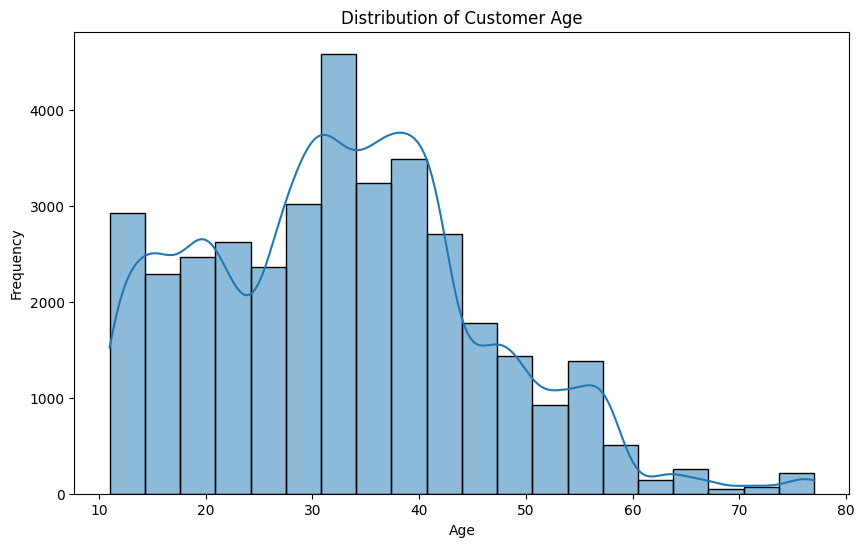

In [558]:
# Hitung usia pelanggan
df['age'] = 2023 - df['payCardBirthDate']

# Visualisasi distribusi usia pelanggan
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show() 

In [559]:
df['age']

0        15
1        26
2        31
3        45
4        41
         ..
37895    19
37896    49
37897    47
37898    47
37899    38
Name: age, Length: 36474, dtype: int64

# 6. CONCLUSION AND RECOMMENDATIONS

## 6.1. CONCLUSION
Setelah menganalisis data transaksi Transjakarta, kita dapat membuat kesimpulan dan rekomendasi sebagai berikut:
1. **Traffic Analysis**
   - Mayoritas transaksi terjadi pada hari kerja, dengan puncak penggunaan pada jam sibuk pergi (Jam 06.00) dan pulang kerja (Jam 17.00).
   - Koridor-koridor tertentu memiliki jumlah transaksi lebih tinggi dibandingkan yang lain, menunjukkan preferensi pengguna terhadap rute tertentu.

2. **Revenue Analysis:**
   - Pendapatan per koridor cenderung bervariasi, dengan beberapa koridor menghasilkan pendapatan lebih tinggi daripada yang lain.
   - Pendapatan per koridor juga bervariasi tergantung pada hari dalam seminggu, dengan puncak penggunaan dan pendapatan pada hari kerja.


3. **Demography Analysis:**
   - Jenis kelamin dan usia pengguna memiliki dampak pada pola perjalanan dan preferensi pembayaran.
   - Mayoritas pengguna adalah perempuan.
   - Pola perjalanan dan preferensi pembayaran dapat berbeda antara kelompok usia.


## 6.2. RECOMMENDATIONS
Berdasarkan analisis penggunaan yang tinggi pada beberapa koridor, terutama selama jam-jam sibuk pergi dan pulang kerja, penambahan bus dapat menjadi strategi yang efektif untuk mengurangi kepadatan dan meningkatkan kualitas layanan. Berikut adalah beberapa rekomendasi terkait penambahan bus di penggunaan yang tinggi:

1. **Peningkatan Frekuensi Layanan:**
- Menambah frekuensi layanan bus pada jam-jam sibuk, terutama selama puncak penggunaan, seperti pada pagi hari antara jam 06.00 dan sore hari antara jam 17.00. Dengan menambah frekuensi layanan, pengguna akan memiliki lebih banyak pilihan dan kemudahan untuk menaiki bus tanpa harus menunggu terlalu lama di halte dan dapat mengatasi lonjakan permintaan.

2. **Penambahan Armada pada Koridor Sibuk:**
- Menambah jumlah armada bus pada koridor-koridor yang memiliki penggunaan tinggi untuk mengakomodasi permintaan yang lebih tinggi.
- Identifikasi koridor-koridor dengan tingkat penggunaan tertinggi dan alokasikan lebih banyak bus pada rute-rute tersebut.

Dengan menerapkan rekomendasi ini, diharapkan dapat meningkatkan kenyamanan, aksesibilitas, dan kepuasan pengguna, serta mengoptimalkan pendapatan Transjakarta.

Tableau:
https://public.tableau.com/app/profile/dzakiah.putri.farikha/viz/Capstone2_17139686513340/Home?publish=yes